In [18]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv('animelist.csv',
                        low_memory=False,
                        usecols=["user_id", "anime_id", "rating"]
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [19]:
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

3427834

In [20]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.4105559954186808


In [21]:

duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


In [22]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2167,4224,5081,5114,6547,6746,9253,9919,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
781,0.7,1.0,0.6,NaN,0.7,0.5,NaN,0.9,0.7,1.0,0.7,0.7,0.9,0.6,0.7,0.9,0.7,0.7,0.7,1.0
890,0.6,0.9,0.7,0.9,0.4,0.2,0.9,0.7,0.3,0.0,NaN,0.5,0.6,0.1,NaN,0.7,NaN,NaN,0.0,0.7
4132,0.7,1.0,0.7,0.6,0.5,0.0,0.9,0.6,0.0,0.9,0.7,0.8,0.8,0.9,0.8,0.9,0.6,0.0,0.7,0.7
4773,0.7,0.7,0.9,1.0,0.8,0.9,0.9,0.8,0.8,1.0,NaN,0.8,0.9,0.7,0.8,0.8,0.4,0.8,0.7,0.8
6536,0.8,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6852,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0.9,0.8,0.0,0.6
7137,1.0,1.0,1.0,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.0,0.9,0.9,0.8,0.8,0.9
7179,0.8,0.7,0.9,0.8,0.7,0.8,1.0,0.7,0.9,0.7,0.6,0.9,0.8,0.4,0.8,0.7,0.7,0.7,0.6,0.7
8481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [23]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 4414, Num of animes: 17157
Min rating: 0.0, Max rating: 1.0


In [24]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [25]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 3417834
> Test set ratings: 10000


In [26]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [27]:
# Accelerator check
import tensorflow as tf

TPU_INIT = False

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.TPUStrategy(tpu)
else:
    !nvidia-smi

print(tf.__version__)

/bin/bash: line 1: nvidia-smi: command not found
2.14.0


In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [29]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128

    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users,
                       output_dim = embedding_size)(user)

    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes,
                       output_dim = embedding_size)(anime)

    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)

    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')

    return model

if TPU_INIT:
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 anime (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               564992    ['user[0][0]']                
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2196096   ['anime[0][0]']               
 )                                                                                          

In [30]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss',
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,
]

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [56]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=400,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=callback
)

model.load_weights(checkpoint_filepath)

Epoch 1/400
342/342 [==============================] - 28s 82ms/step - loss: 0.7965 - mae: 0.3812 - mse: 0.1961 - val_loss: 0.7994 - val_mae: 0.3863 - val_mse: 0.1998
Epoch 2/400
342/342 [==============================] - 35s 104ms/step - loss: 0.7768 - mae: 0.3733 - mse: 0.1882 - val_loss: 0.7949 - val_mae: 0.3848 - val_mse: 0.1980
Epoch 3/400
342/342 [==============================] - 34s 98ms/step - loss: 0.7598 - mae: 0.3662 - mse: 0.1812 - val_loss: 0.7858 - val_mae: 0.3814 - val_mse: 0.1944
Epoch 4/400
342/342 [==============================] - 34s 98ms/step - loss: 0.7407 - mae: 0.3577 - mse: 0.1733 - val_loss: 0.7711 - val_mae: 0.3753 - val_mse: 0.1884
Epoch 5/400
342/342 [==============================] - 28s 82ms/step - loss: 0.7167 - mae: 0.3464 - mse: 0.1632 - val_loss: 0.7492 - val_mae: 0.3651 - val_mse: 0.1792
Epoch 6/400
342/342 [==============================] - 28s 81ms/step - loss: 0.6870 - mae: 0.3317 - mse: 0.1505 - val_loss: 0.7198 - val_mae: 0.3507 - val_mse: 0.16

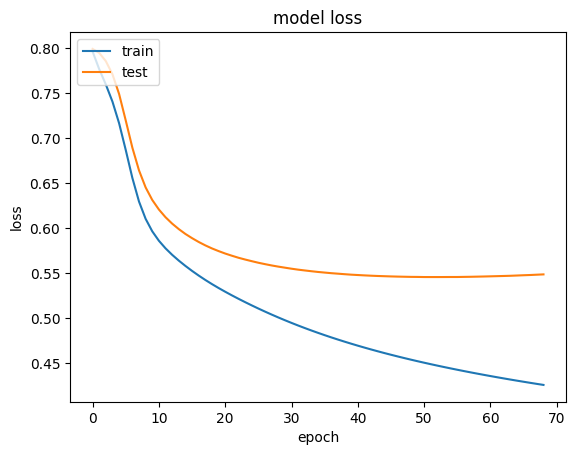

In [58]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
# plt.xticks(range(0, 80))
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [59]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [60]:
df = pd.read_csv('anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [61]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')

    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'],
               inplace=True,
               ascending=False,
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version",
         "Score", "Genres", "Episodes",
         "Type", "Premiered", "Members"]]

In [62]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

In [63]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv('anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [64]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest

        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)

            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [66]:
find_similar_animes('Attack on Titan', n=5, neg=False)

animes closest to Attack on Titan
Attack on Titan!, Not Found in Anime list


In [ ]:
find_similar_animes('Your Name.', n=5, neg=False)

In [ ]:
find_similar_animes('Sword Art Online', n=5, neg=False)

In [ ]:
find_similar_animes('Black Clover', n=5, neg=False)

In [49]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Summer Days with Coo,0.335701,"Adventure, Demons, Shounen","Kouichi Uehara is a fourth grade student living in the suburb of Tokyo. One day, he picks up a large stone which turns out to be a fossil of a baby ""Kappa"" who has been sleeping underground for the past 300 years, and names it ""Coo."" They become good friends and Coo starts living with Kouichi's family. However, Coo has a hard time adjusting to life among humans and misses his kind."
3,Battle Programmer Shirase,0.314071,"Comedy, Ecchi, Sci-Fi","Battle Programmer Shirase, also known as BPS, is a free programmer with super hacking abilities who doesn't work for money. What he does work for is certainly something that only people like him would appreciate. But, his demeanor certainly doesn't suit the jobs he is hired for. With the evil King of America causing trouble via the internet, Shirase is nothing but busy as each new adventure brings even more interesting people into the picture. (Source: ANN)"
2,Calamity of the Zombie Girl,0.310926,"Action, Horror, Supernatural, Thriller","On a hot summer day, five university students sneak into the library storage to look for some treasure. They find two sets of female antique mummies from Italy around the age of 14–20 years old. One of the students, Sayaka, rips open the mummy and takes out a stone called ""stone of life,"" which gave the mummies super strength and eternal life. Having stolen their ""stone of life,"" the two mummy girls wake up and become zombies after 100 years in order to get it back in a bloody gruesome way, smashing their heads and eating their flesh for power. The only way for the students to get out is to somehow find a way to kill the zombie girls. Will they be able to survive? (Source: Shochiku)"
1,One Piece: Nenmatsu Tokubetsu Kikaku! Mugiwara no Luffy Oyabun Torimonochou,0.308847,"Adventure, Comedy, Historical, Fantasy, Shounen","In an alternate reality world that resembles Edo Period Japan, Luffy acts as a member of the police. This is made up of two adventures: in the first, Buggy makes trouble in the town; in the second, a mysterious girl named Vivi appears (aired after Episode 253). This special contains several cameos from characters throughout the entire series. A second pair of episodes were aired after episode 290, continuing this story, as part of the New Year's special."
0,Future Card Buddyfight Recap,0.305207,Game,cap episode aired between episodes 23 and 24.


In [50]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 1708


In [51]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df
        SimilarityArr = []

        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id,
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [54]:
similar_users = find_similar_users(int(random_user),
                                   n=5,
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.25]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #1708


,similar_users,similarity
4,15054,0.320348
3,13890,0.269053
2,1563,0.268844
1,9871,0.264741
0,8289,0.259396
